In [41]:
#imports 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt



In [42]:
# Load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [44]:
df_train.isna().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [45]:
categorical_variables = df_train.select_dtypes(include=['object']).columns
numerical_variables = list(df_train._get_numeric_data().columns)


<AxesSubplot:>

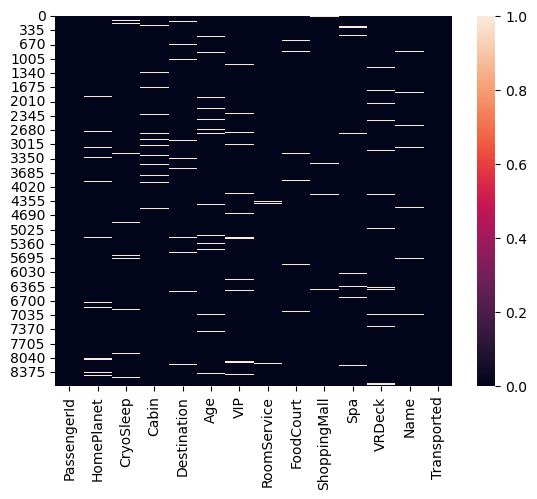

In [46]:
sns.heatmap(df_train.isna())

In [47]:
# Start by cleaning the data and removing the nulls
for cat in categorical_variables:
    if cat != 'Name':
        df_train[cat].fillna(df_train[cat].mode()[0],inplace=True)

for cat in categorical_variables:
    if cat != 'Name':
        df_test[cat].fillna(df_test[cat].mode()[0],inplace=True)

df_train.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [48]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [49]:
for num in numerical_variables:
    df_train[num].fillna(df_train[num].mean(),inplace=True)

for num in numerical_variables:
    if num != 'Transported':
        df_test[num].fillna(df_test[num].mean(),inplace=True)
df_train.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [50]:
df_train.drop('Name',axis=1,inplace=True)
df_test.drop('Name',axis=1,inplace=True)


In [51]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [52]:
df_train['CryoSleep'] = df_train['CryoSleep'].replace({True: 1, False: 0})
df_train['VIP'] = df_train['VIP'].replace({True: 1, False: 0})

#test
df_test['CryoSleep'] = df_test['CryoSleep'].replace({True: 1, False: 0})
df_test['VIP'] = df_test['VIP'].replace({True: 1, False: 0})


In [53]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True


In [54]:
df_train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [55]:
df_train['HomePlanet'] = df_train['HomePlanet'].replace({'Europa': 0, 'Earth': 1,'Mars':2})
df_test['HomePlanet'] = df_test['HomePlanet'].replace({'Europa': 0, 'Earth': 1,'Mars':2})



In [56]:
df_train['Deck'] = df_train['Cabin'].str.split("/").str[0]
df_train['Num']= df_train['Cabin'].str.split('/').str[1]
df_train['Side']=  df_train['Cabin'].str.split('/').str[2]


df_test['Deck'] = df_test['Cabin'].str.split("/").str[0]
df_test['Num']= df_test['Cabin'].str.split('/').str[1]
df_test['Side']=  df_test['Cabin'].str.split('/').str[2]



In [57]:
df_train["Side"] = df_train['Side'] == 'P'
df_test["Side"] = df_test['Side'] == 'P'

df_train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,0,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,0,True
1,0002_01,1,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,0,False
2,0003_01,0,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,0,False
3,0003_02,0,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,0,False
4,0004_01,1,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,F,1,False


In [58]:
df_train["Side"] = df_train['Side'].astype(int)


df_test["Side"] = df_test['Side'].astype(int)


In [59]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,0,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,0,1
1,0002_01,1,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,0,0
2,0003_01,0,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,0,0
3,0003_02,0,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,0,0
4,0004_01,1,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,F,1,0


In [60]:
df_train['Deck'] = df_train['Deck'].map({'B':0,'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)

df_test['Deck'] = df_test['Deck'].map({'B':0,'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)



In [61]:
df_train['Destination'] = df_train['Destination'].map(dict(zip(df_train['Destination'].unique(),list(range(len(df_train['Destination'].unique())))))).astype(int)
df_test['Destination'] = df_test['Destination'].map(dict(zip(df_test['Destination'].unique(),list(range(len(df_test['Destination'].unique())))))).astype(int)

In [62]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,0,0,B/0/P,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0,1
1,0002_01,1,0,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,0,0
2,0003_01,0,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,0,0
3,0003_02,0,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,0,0
4,0004_01,1,0,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1,0


# Modeling 


In [63]:
# Preparing data for the model
df_train.drop(['Cabin'],axis=1,inplace=True)



df_test.drop(['Cabin'],axis=1,inplace=True)



In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [65]:
x= df_train[['PassengerId',	'HomePlanet',	'CryoSleep',	'Destination',	'Age',	'VIP',	'RoomService',	'FoodCourt',	'ShoppingMall',	'Spa',	'VRDeck',	'Deck',	'Num',	'Side']]
y = df_train['Transported']
x

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0001_01,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,0002_01,1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0
2,0003_01,0,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,2,0,0
3,0003_02,0,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,2,0,0
4,0004_01,1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,0,2,41.0,1,0.0,6819.0,0.0,1643.0,74.0,2,98,1
8689,9278_01,1,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,3,1499,0
8690,9279_01,1,0,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,3,1500,0
8691,9280_01,0,0,2,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4,608,0


In [66]:
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred_score = lr.score(x_test,y_test)
lr_pred_score


0.7671075330649799

In [68]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred_score = gb.score(x_test,y_test)
gb_pred_score

0.8016101207590569

In [69]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred_score = rf.score(x_test,y_test)
rf_pred_score

0.7878090856814262

# Finding the optimal k value to use

In [70]:
error_rate=[]#list that will store the average error rate value of k
for i in range (1,31):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train)
    predict_i=clf.predict(x_test)
    error_rate.append(np.mean(predict_i!=y_test))
error_rate

/Users/slimanitz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/slimanitz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

[0.35020126509488214,
 0.3783783783783784,
 0.3617021276595745,
 0.3927544565842438,
 0.3956296722254169,
 0.3956296722254169,
 0.40540540540540543,
 0.4025301897642323,
 0.40713053479010924,
 0.41345600920069003,
 0.40540540540540543,
 0.41748131109833236,
 0.4243818286371478,
 0.41748131109833236,
 0.4278320874065555,
 0.4347326049453709,
 0.4341575618171363,
 0.437607820586544,
 0.437607820586544,
 0.44623346751006326,
 0.4485336400230017,
 0.4427832087406556,
 0.4479585968947671,
 0.44680851063829785,
 0.4508338125359402,
 0.4485336400230017,
 0.4445083381253594,
 0.44335825186889016,
 0.4439332949971248,
 0.44623346751006326]

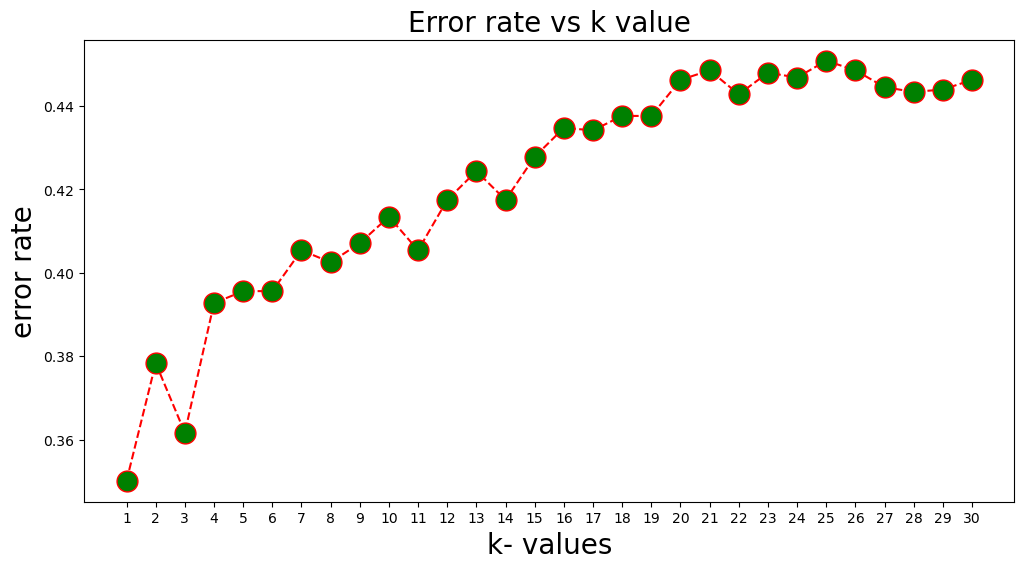

In [71]:
#plotting the error rate vs k graph 
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

In [72]:


knn = KNeighborsClassifier(6)
knn.fit(x_train,y_train)
knn_pred_score = knn.score(x_test,y_test)

/Users/slimanitz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(0.0, 5.0)

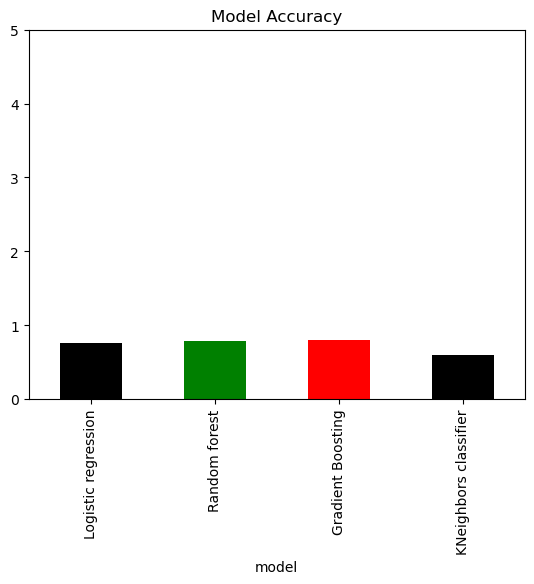

In [73]:
df = pd.DataFrame(dict(model=['Logistic regression','Random forest','Gradient Boosting','KNeighbors classifier'],accuracy=[lr_pred_score,rf_pred_score,gb_pred_score,knn_pred_score]))
df.plot(kind='bar',x='model',y='accuracy',title='Model Accuracy',legend=False,color=['Black','Green','Red'])
plt.ylim(0,5,1)

In [74]:
# Creating the cleaned test
df_test.to_csv('cleaned_test.csv')

In [78]:
prediction = gb.predict(df_test)

In [79]:
prediction

array([ True, False,  True, ...,  True,  True,  True])

In [80]:
submission_df = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported':prediction})
submission_df.to_csv('submission.csv',index=False)